# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
#url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

#url = 'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"

#Build query URL
#city_url = f"{url}appid={weather_api_key}&units={units}&q="
#city_url = 'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | poyarkovo
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | kavarna
Processing Record 4 of Set 1 | kone
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | keflavik
Processing Record 12 of Set 1 | coahuayana de hidalgo
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | walvis bay
Processing Record 17 of Set 1 | okhotsk
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | saldanha
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,poyarkovo,49.6000,128.6833,261.79,95,100,2.19,RU,1740430876
1,bilibino,68.0546,166.4372,232.90,98,40,1.41,RU,1740430878
2,kavarna,43.4333,28.3333,272.36,75,3,3.13,BG,1740430880
3,kone,-21.0595,164.8658,299.79,75,78,1.51,NC,1740430883
4,ribeira grande,38.5167,-28.7000,287.37,77,20,2.57,PT,1740430884


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poyarkovo,49.6000,128.6833,261.79,95,100,2.19,RU,1740430876
1,bilibino,68.0546,166.4372,232.90,98,40,1.41,RU,1740430878
2,kavarna,43.4333,28.3333,272.36,75,3,3.13,BG,1740430880
3,kone,-21.0595,164.8658,299.79,75,78,1.51,NC,1740430883
4,ribeira grande,38.5167,-28.7000,287.37,77,20,2.57,PT,1740430884


### Create the Scatter Plots Requested

#### 1. Latitude Vs. Temperature Scatter Plot

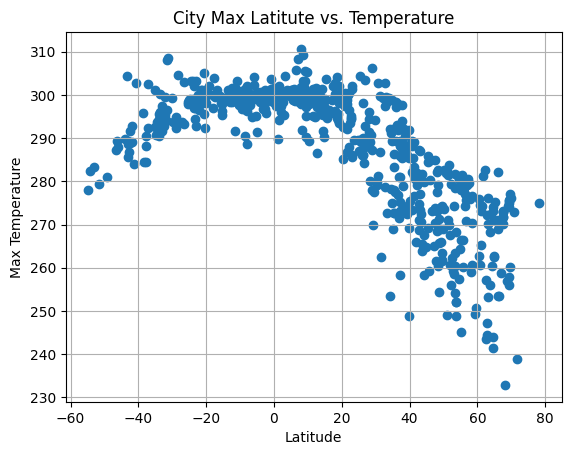

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitute vs. Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### 2. Latitude Vs. Humidity Scatter Plot

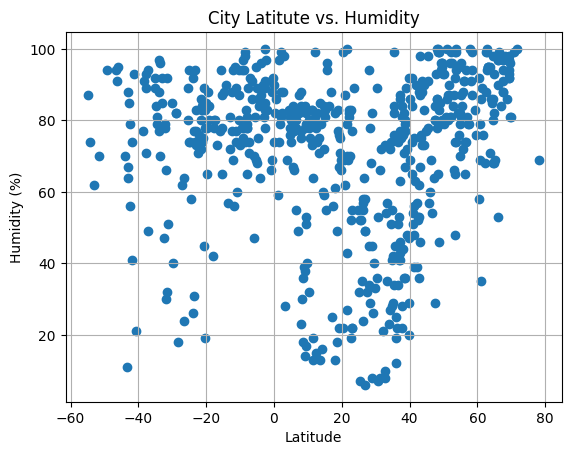

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitute vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### 3. Latitude Vs. Cloudiness Scatter Plot

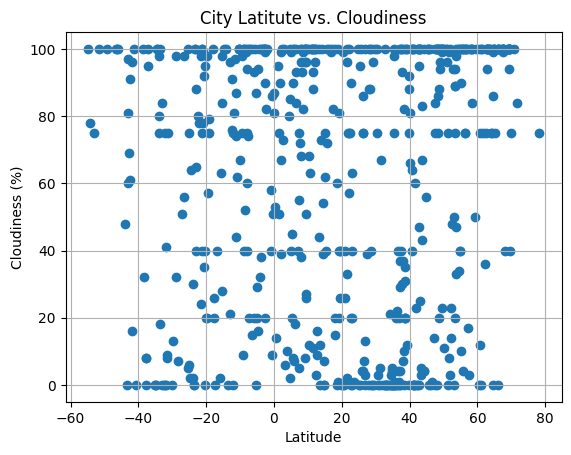

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitute vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### 4. Latitude vs. Wind Speed Scatter Plot

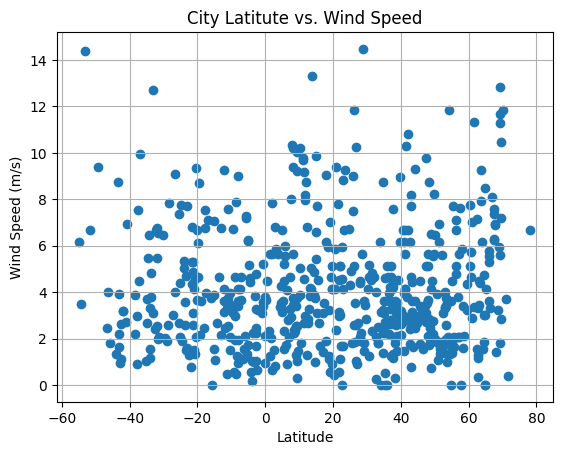

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitute vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


#### 1. Latitude vs. Temperature Linear Regression

The r-value is:-0.7000142493999253


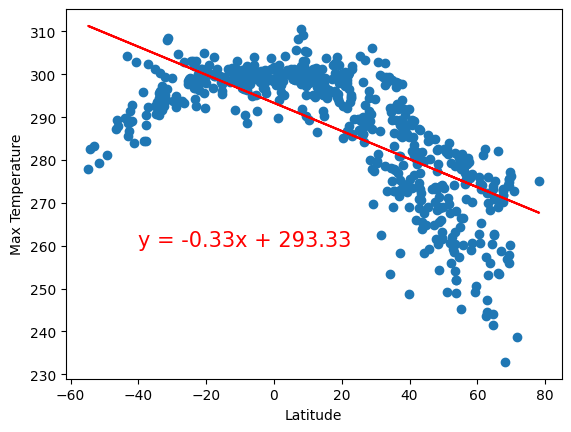

In [61]:
# Define a function to create Linear Regression plots: 
# 1. Latitude vs. Temperature

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()


#### 2. Latitude vs. Humidity Linear Regression

The r-value is:0.04914824036064056


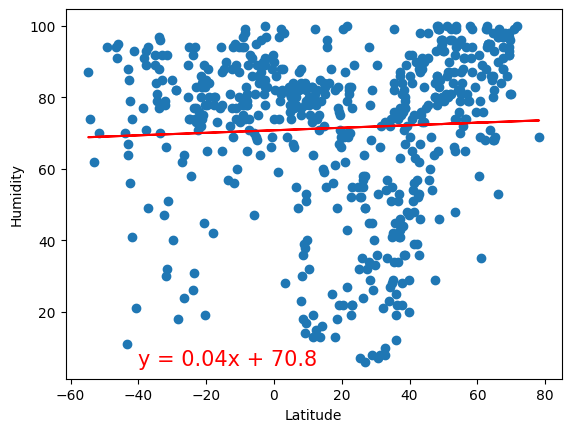

In [60]:
# Define a function to create Linear Regression plots:
# 2. Latitude vs. Humidity Linear Regression

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()


#### 3. Latitude vs. Cloudiness Linear Regression

The r-value is:0.0638398137712649


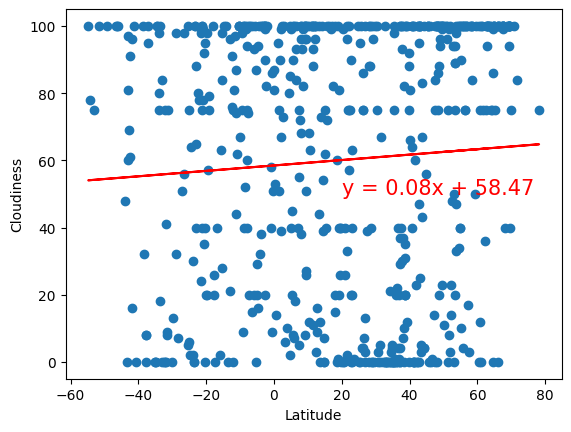

In [57]:
# Define a function to create Linear Regression plots: 
# 3. Latitude vs. Cloudiness Linear Regression

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

#### 4. Latitude vs. Wind Speed Linear Regression

The r-value is:0.020478075797432625


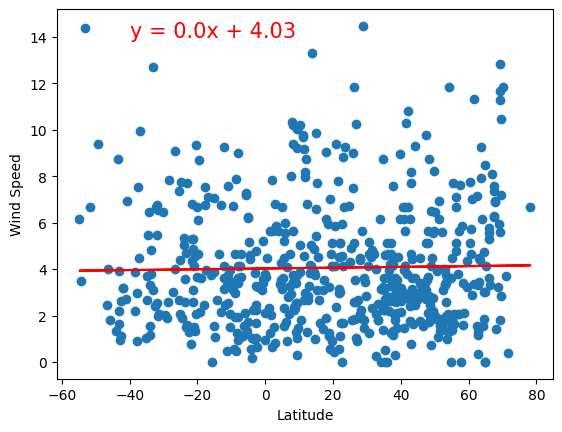

In [56]:
# Define a function to create Linear Regression plots: 
# 4. Latitude vs. Wind Speed Linear Regression

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,poyarkovo,49.6000,128.6833,261.79,95,100,2.19,RU,1740430876
1,bilibino,68.0546,166.4372,232.90,98,40,1.41,RU,1740430878
2,kavarna,43.4333,28.3333,272.36,75,3,3.13,BG,1740430880
4,ribeira grande,38.5167,-28.7000,287.37,77,20,2.57,PT,1740430884
10,keflavik,64.0049,-22.5624,272.39,86,75,6.17,IS,1740430913


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kone,-21.0595,164.8658,299.79,75,78,1.51,NC,1740430883
5,puerto natales,-51.7236,-72.4875,279.40,70,100,6.69,CL,1740430612
6,grytviken,-54.2811,-36.5092,282.49,74,78,3.50,GS,1740430902
7,port elizabeth,-33.9180,25.5701,295.55,97,75,1.54,ZA,1740430910
8,margaret river,-33.9500,115.0667,290.40,77,98,3.31,AU,1740430911


###  1. Temperature vs. Latitude Linear Regression Plot

#### 1a. Northern Hemisphere Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Test: Perform  linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
print(f"slope: {round(slope,2)}")
print(f"intercept: {round(intercept,2)}")
print(f"Correlation-Coefficient: {round(rvalue,2)}")

#Get regression values - what we're trying to predict
regress_values = slope * x_values + intercept
print(regress_values)

slope: -0.33
intercept: 293.33
Correlation-Coefficient: -0.7
City_ID
0      277.075865
1      271.027681
2      279.096897
3      300.233323
4      280.708229
          ...    
573    276.149921
574    295.925075
575    274.203907
576    277.064755
577    272.712033
Name: Lat, Length: 578, dtype: float64


In [ ]:
# Test: Create Line Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.63x +32.49


The r-value is:-0.806900319760515


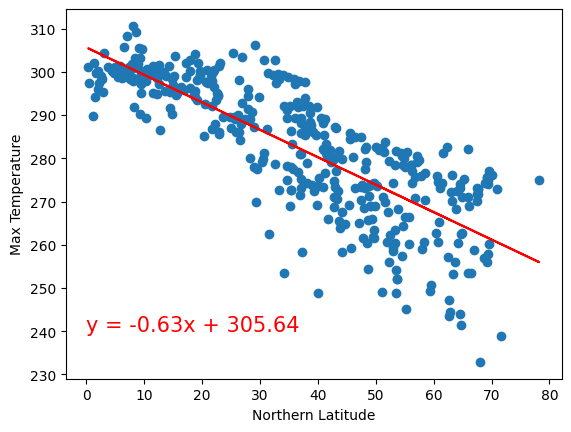

In [55]:
# Linear regression: Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,240),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

#### 1b. Southern Hemisphere Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Test: Perform  linear regression 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
print(f"slope: {round(slope,2)}")
print(f"intercept: {round(intercept,2)}")
print(f"Correlation-Coefficient: {round(rvalue,2)}")

#Get regression values
regress_values = slope * x_values + intercept
print(regress_values)

slope: -0.63
intercept: 305.64
Correlation-Coefficient: -0.81
City_ID
0      274.152599
1      262.436194
2      278.067697
4      281.189134
10     265.007256
          ...    
571    294.900006
573    272.358881
575    268.589107
576    274.131077
577    265.699082
Name: Lat, Length: 405, dtype: float64


In [ ]:
# Test: Create Line Equation String
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.63x +305.64


The r-value is:0.5999653189018407


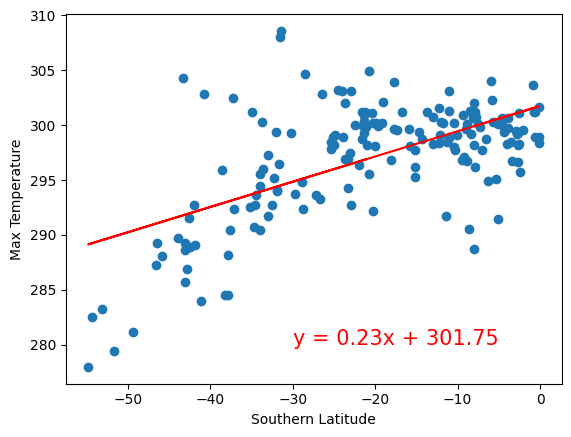

In [54]:
# Linear regression: Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,280),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r^2-value is: 0.6720220238897325


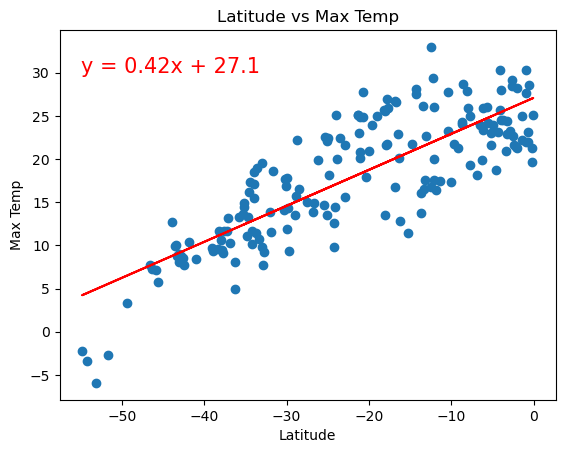

In [ ]:
# Test 
# Linear regression on Southern Hemisphere
#Perform  linear regression on Max Temp vs. Latitude
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
#print(f"slope: {round(slope,2)}")
#print(f"intercept: {round(intercept,2)}")
#print(f"Correlation-Coefficient: {round(rvalue,2)}")

#Get regression values
#regress_values = slope * x_values + intercept
#print(regress_values)

**Discussion about the linear relationship:** 

For the northern hemisphere, the r value of -0.807 suggests there is a strong negative correlation between Max Temp and Northern Latitute, meaning as one variable increases the other tends to decrease.

For the southern hemisphere, the r value of 0.599 suggests there is a moderate to strong positive correlation between Max Temp and Southern Latitute.

### 2. Humidity vs. Latitude Linear Regression Plot

#### 2a. Northern Hemisphere Humidity vs. Latitude Linear Regression Plot

The r-value is:0.32167748829332704


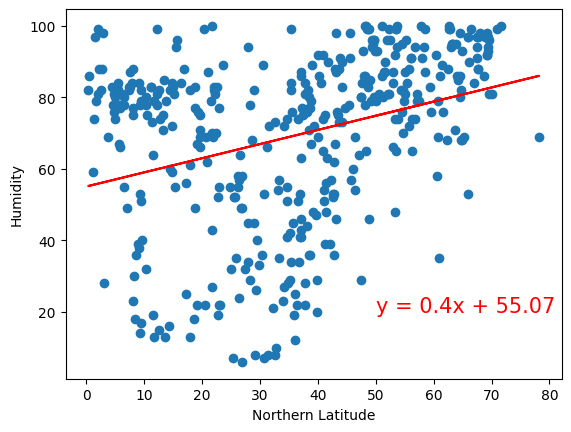

In [53]:
# Northern Hemisphere
# Leverage same code from above, making sure to change hemisphere df, variable, and annotations/labels

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

#### 2b. Southern Hemisphere Humidity vs. Latitude Linear Regression Plot

The r-value is:0.20168319205431057


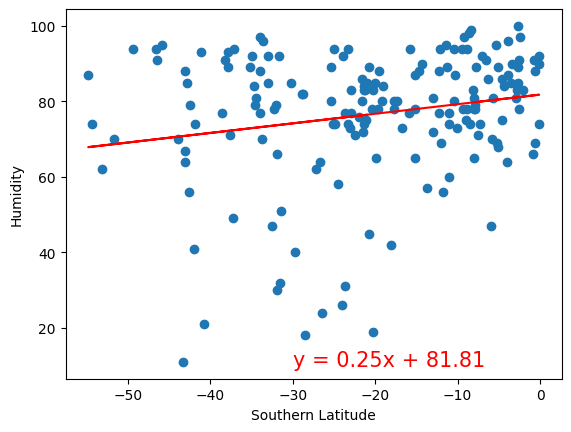

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 

For the northern hemisphere, the r value of 0.32167748829332704 suggests there is a positive but weak correlation between Humidity and Northern Latitute.

For the southern hemisphere, the r value of 0.20168319205431057 suggests there is also a positive but weak correlation between Humidity and Northern Latitute.


### 3. Cloudiness vs. Latitude Linear Regression Plot

#### 3a. Northern Hemisphere Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.16998424328669776


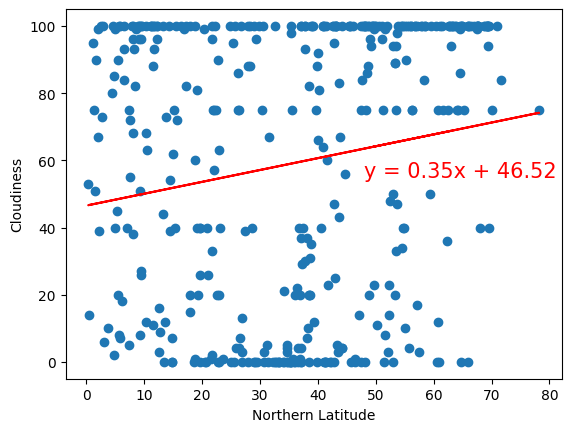

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,55),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

#### 3b. Southern Hemisphere Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.10604091430644774


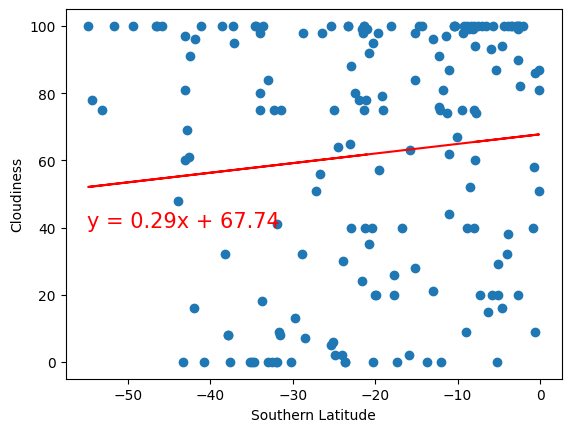

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 

For the northern hemisphere, the r value of 0.16998424328669776 suggests there is a positive but extremely weak correlation between Cloudiness and Northern Latitute.

For the southern hemisphere, the r value of 0.10604091430644774 suggests there is also a positive but extremely weak correlation between Cloudiness and Northern Latitute.

Both values are close to zero indicating a weak correlation.

### 4. Wind Speed vs. Latitude Linear Regression Plot

#### 4a. Northern Hemisphere Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.018015436170557536


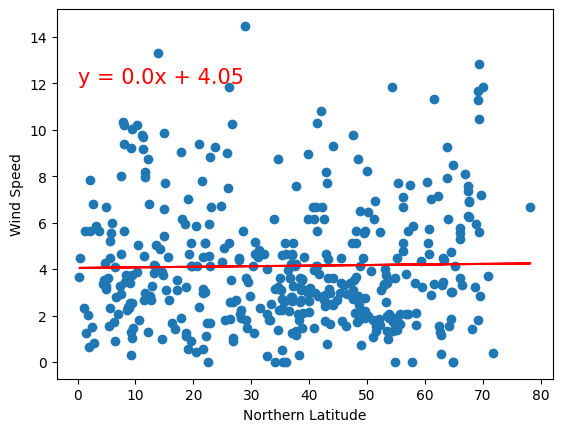

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

#### 4b. Southern Hemisphere Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.199759525531205


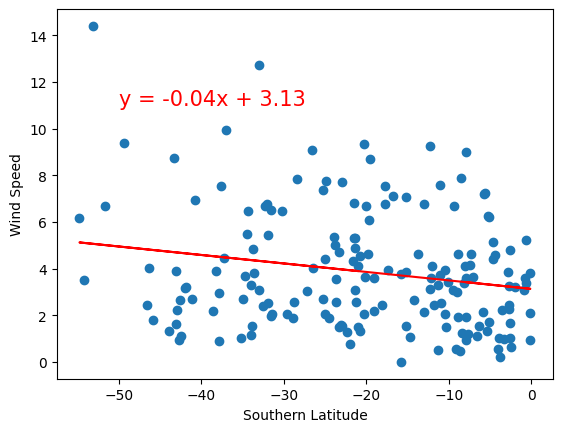

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,11),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 

For the northern hemisphere, the r value of 0.018015436170557536 suggests there is almost no correlation between Wind Speed and Northern Latitute since the number is so close to zero.

For the southern hemisphere, the r value of -0.199759525531205 suggests there is a negative, extremely weak, correlation between Wind Speed and Northern Latitute.